In [1]:
#importing essential libraried
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import plotly.express as px


In [2]:
df = pd.read_csv('/content/1730285881-Airbnb_Open_Data.csv')

/tmp/ipython-input-1710893607.py:1: DtypeWarning: Columns (2,8,14,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/1730285881-Airbnb_Open_Data.csv')


##Data Understanding

In [3]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.9419,United States,...,$124,3.0,0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
df.shape

(105149, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105149 entries, 0 to 105148
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              105149 non-null  int64  
 1   NAME                            104884 non-null  object 
 2   host id                         105149 non-null  object 
 3   host_identity_verified          104837 non-null  object 
 4   host name                       104696 non-null  object 
 5   neighbourhood group             105120 non-null  object 
 6   neighbourhood                   105133 non-null  object 
 7   lat                             105141 non-null  float64
 8   long                            105141 non-null  object 
 9   country                         104617 non-null  object 
 10  country code                    105018 non-null  object 
 11  instant_bookable                105044 non-null  object 
 12  cancellation_pol

In [6]:
df.duplicated().value_counts()

,count
False,102207
True,2942


In [7]:
df.describe()

,id,lat,minimum nights,reviews per month,review rate number,calculated host listings count,availability 365
count,1.051490e+05,105141.000000,104731.000000,88874.000000,104823.000000,104830.000000,104700.000000
mean,2.879620e+07,40.727013,8.077408,1.369095,3.280139,7.809740,139.783763
std,1.621205e+07,0.358177,30.254350,1.741176,1.284822,31.852566,135.361152
min,1.001254e+06,-73.990710,-1223.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.472323e+07,40.688720,2.000000,0.220000,2.000000,1.000000,2.000000
50%,2.843242e+07,40.722270,3.000000,0.730000,3.000000,1.000000,93.000000
75%,4.284911e+07,40.762790,5.000000,2.000000,4.000000,2.000000,267.000000
max,5.736742e+07,40.916970,5645.000000,90.000000,5.000000,332.000000,3677.000000


##Data Cleaning

In [8]:
#drop duplicate records
df.drop_duplicates(inplace=True)

In [9]:
df.drop(['house_rules','license'],axis=1,inplace=True)

In [10]:
df['price'] = df['price'].str.replace('$','',regex = False)
df['service fee'] = df['service fee'].str.replace('$','',regex=False)

In [11]:
df['price'] = df['price'].str.replace(',','',regex = False)
df['service fee'] = df['service fee'].str.replace(',','',regex=False)

In [12]:
df.rename(columns={'price' : 'price_$',
                   'service fee' : 'service_fee_$'},inplace=True)

In [13]:
df.dropna(inplace=True)

In [14]:
#change all mismatched datatypes
df['price_$'] = df['price_$'].astype(float)
df['service_fee_$'] = df['service_fee_$'].astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype(int)

/tmp/ipython-input-2463647750.py:6: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['last review'] = pd.to_datetime(df['last review'])


In [15]:
# Fill NaNs first (using median as it's less affected by extremes)
df['minimum nights'].fillna(df['minimum nights'].median(), inplace=True)

# Handle impossible values: Cap negative values at 1 night
df['minimum nights'] = df['minimum nights'].apply(lambda x: x if x >= 1 else 1)

# Values up to 5645 are extreme outliers. Capping at 365 nights.
max_nights_cap = 365
df['minimum nights'] = np.where(df['minimum nights'] > max_nights_cap, max_nights_cap, df['minimum nights'])


/tmp/ipython-input-1998722571.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['minimum nights'].fillna(df['minimum nights'].median(), inplace=True)


In [16]:
# Fill NaNs (using median)
df['availability 365'].fillna(df['availability 365'].median(), inplace=True)

# Negative values are set to 0. Values > 365 are capped at 365.
df['availability 365'] = np.where(df['availability 365'] < 0, 0, df['availability 365'])
df['availability 365'] = np.where(df['availability 365'] > 365, 365, df['availability 365'])

/tmp/ipython-input-3898267474.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['availability 365'].fillna(df['availability 365'].median(), inplace=True)


In [17]:
df = df.drop(df[df['availability 365']>500].index)

In [18]:
df.duplicated().value_counts()

,count
False,83516


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83516 entries, 0 to 105147
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83516 non-null  object        
 1   NAME                            83516 non-null  object        
 2   host id                         83516 non-null  object        
 3   host_identity_verified          83516 non-null  object        
 4   host name                       83516 non-null  object        
 5   neighbourhood group             83516 non-null  object        
 6   neighbourhood                   83516 non-null  object        
 7   lat                             83516 non-null  float64       
 8   long                            83516 non-null  object        
 9   country                         83516 non-null  object        
 10  country code                    83516 non-null  object        
 11  instan

##Exploratory data analysis(EDA)

In [20]:
df.describe()

,lat,Construction year,price_$,service_fee_$,minimum nights,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83516.000000,83516.000000,83516.000000,83516.000000,83516.000000,83516,83516.000000,83516.000000,83516.000000,83516.000000
mean,40.727357,2012.488625,626.229297,125.246995,7.268763,2019-06-08 05:10:43.306671872,1.376686,3.278593,7.029180,141.064155
min,40.504560,2003.000000,50.000000,10.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,0.000000
25%,40.687650,2007.000000,340.000000,68.000000,2.000000,2018-10-25 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721320,2012.000000,625.000000,125.000000,3.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762610,2017.000000,914.000000,183.000000,5.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,2022.000000,1200.000000,240.000000,365.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,365.000000
std,0.056317,5.760554,331.772026,66.357965,15.961102,NaN,1.750529,1.283746,29.534964,131.909245


In [21]:
#different property types:
property_types = df['room type'].value_counts().to_frame()
property_types


,count
room type,
Entire home/apt,44218
Private room,37543
Shared room,1647
Hotel room,108


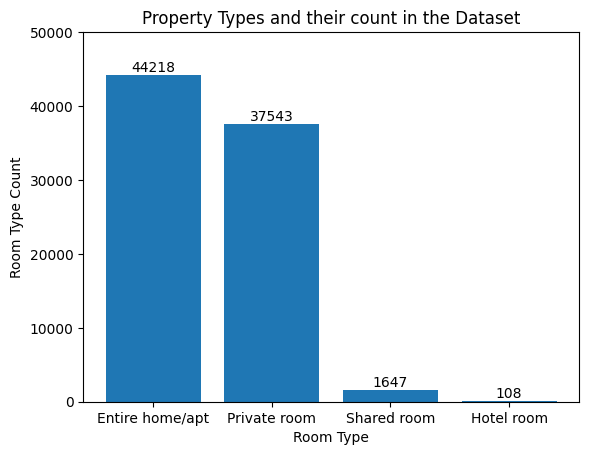

In [22]:
room_type_bar = plt.bar(property_types.index,property_types.loc[:,'count']);
plt.bar_label(room_type_bar,labels = property_types.loc[:,'count']);
plt.ylim([0,50000]);
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Property Types and their count in the Dataset');


In [23]:
#neighbourhood group with highest number of listing:
hood_group  = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34684
Manhattan,34613
Queens,11135
Bronx,2267
Staten Island,816
brookln,1


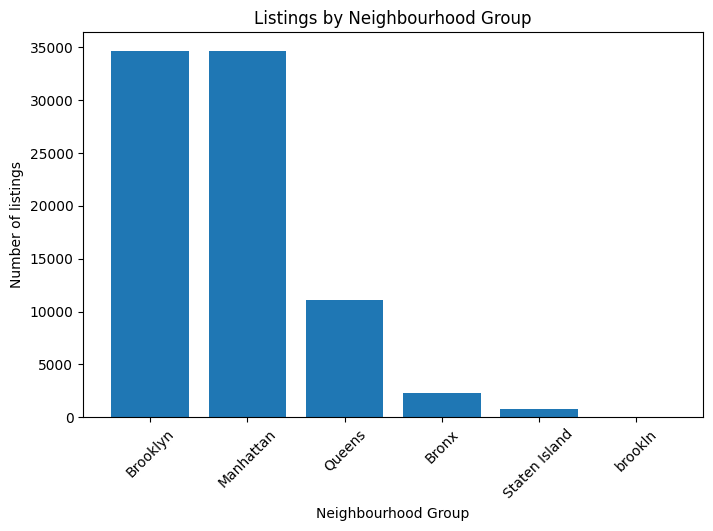

Insight: Most listings are in: Brooklyn


In [24]:
#EDA: Listings by neighbourhood_group
if 'neighbourhood group' in df.columns:
    counts = df['neighbourhood group'].value_counts()
    fig = plt.figure(figsize=(8,5))
    plt.bar(counts.index.astype(str), counts.values)
    plt.title('Listings by Neighbourhood Group')
    plt.xlabel('Neighbourhood Group')
    plt.ylabel('Number of listings')
    plt.xticks(rotation=45)
    plt.show()
    print("Insight: Most listings are in:", counts.idxmax())


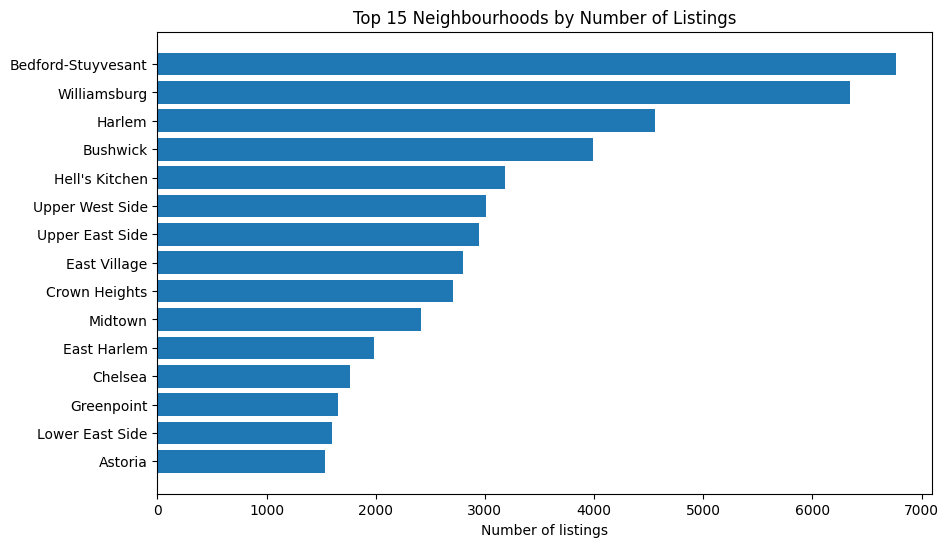

Insight: Top neighbourhood (by listings): Bedford-Stuyvesant


In [25]:
# EDA: Top neighbourhoods (by listing count)
if 'neighbourhood' in df.columns:
    top_neigh = df['neighbourhood'].value_counts().head(15)
    fig = plt.figure(figsize=(10,6))
    plt.barh(top_neigh.index[::-1].astype(str), top_neigh.values[::-1])
    plt.title('Top 15 Neighbourhoods by Number of Listings')
    plt.xlabel('Number of listings')
    plt.show()
    print("Insight: Top neighbourhood (by listings):", top_neigh.index[0])


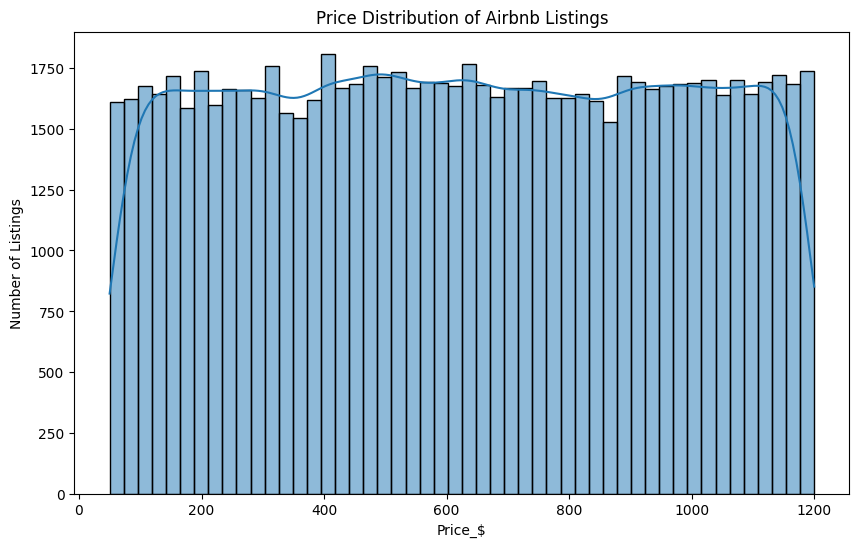

In [26]:
# Price Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['price_$'], bins=50, kde=True)
plt.title('Price Distribution of Airbnb Listings')
plt.xlabel('Price_$')
plt.ylabel('Number of Listings')
plt.show()

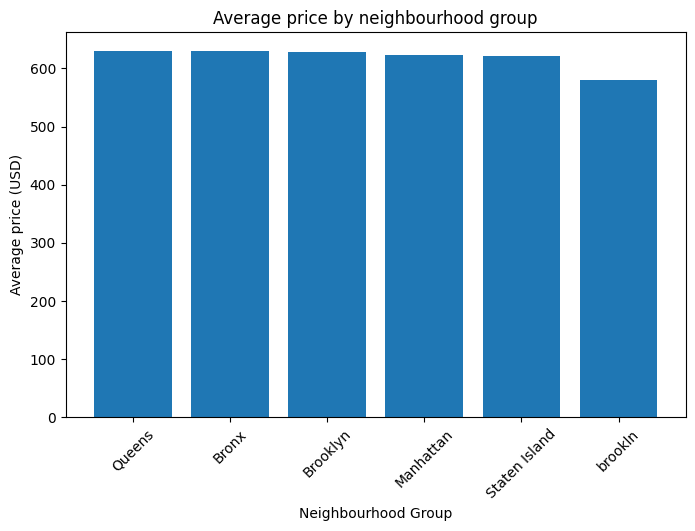

Insight: Highest avg price neighbourhood group: Queens -> $ 630.52


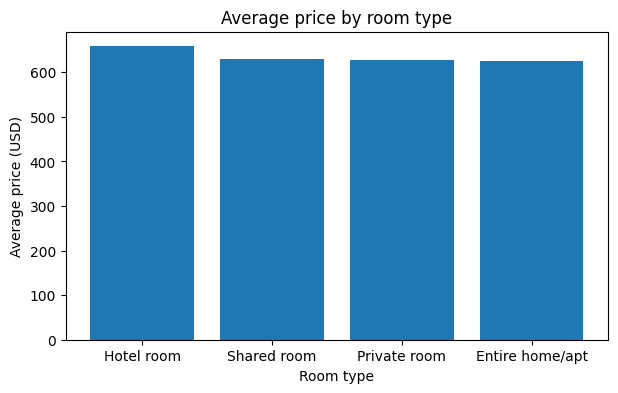

Insight: Most expensive room type (avg): Hotel room


In [27]:
#EDA: Avg price by neighbourhood_group & by room_type
if 'price_$' in df.columns and 'neighbourhood group' in df.columns:
    avg_grp = df.groupby('neighbourhood group')['price_$'].mean().dropna().sort_values(ascending=False)
    fig = plt.figure(figsize=(8,5))
    plt.bar(avg_grp.index.astype(str), avg_grp.values)
    plt.title('Average price by neighbourhood group')
    plt.xlabel('Neighbourhood Group')
    plt.ylabel('Average price (USD)')
    plt.xticks(rotation=45)
    plt.show()
    print("Insight: Highest avg price neighbourhood group:", avg_grp.idxmax(), "-> $", round(avg_grp.max(),2))

if 'price_$' in df.columns and 'room type' in df.columns:
    avg_room = df.groupby('room type')['price_$'].mean().dropna().sort_values(ascending=False)
    fig = plt.figure(figsize=(7,4))
    plt.bar(avg_room.index.astype(str), avg_room.values)
    plt.title('Average price by room type')
    plt.xlabel('Room type')
    plt.ylabel('Average price (USD)')
    plt.show()
    print("Insight: Most expensive room type (avg):", avg_room.idxmax())


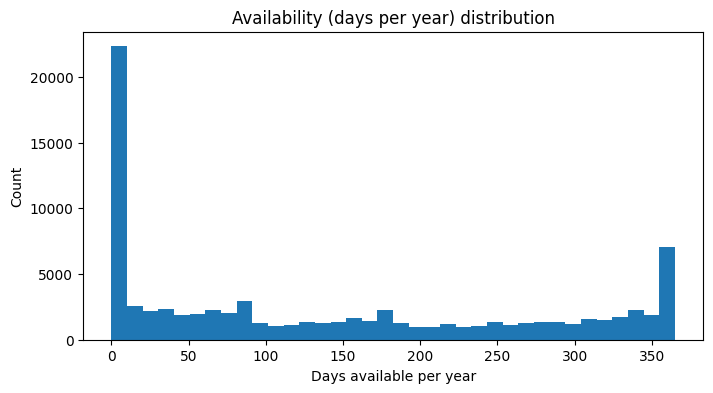

Insight: Median availability: 101.0


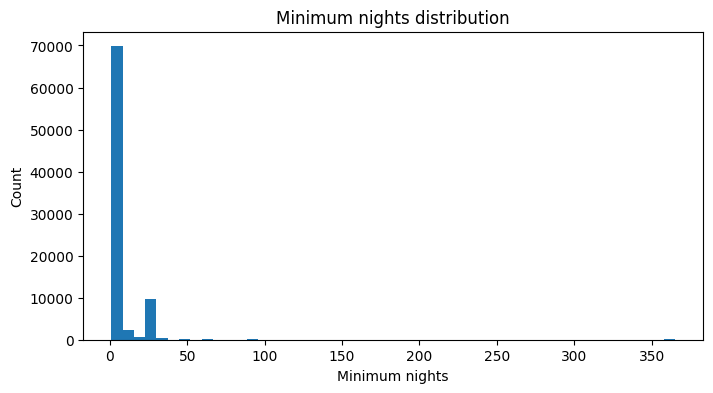

Insight: Many listings have minimum_nights near: 2.0


In [28]:
#EDA: Availability & minimum nights distributions
if 'availability 365' in df.columns:
    fig = plt.figure(figsize=(8,4))
    plt.hist(df['availability 365'].dropna(), bins=36)
    plt.title('Availability (days per year) distribution')
    plt.xlabel('Days available per year')
    plt.ylabel('Count')
    plt.show()
    print("Insight: Median availability:", df['availability 365'].median())

if 'minimum nights' in df.columns:
    fig = plt.figure(figsize=(8,4))
    plt.hist(df['minimum nights'].dropna(), bins=50)
    plt.title('Minimum nights distribution')
    plt.xlabel('Minimum nights')
    plt.ylabel('Count')
    plt.show()
    print("Insight: Many listings have minimum_nights near:", df['minimum nights'].mode().iloc[0])


In [29]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price_$', 'service_fee_$', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')

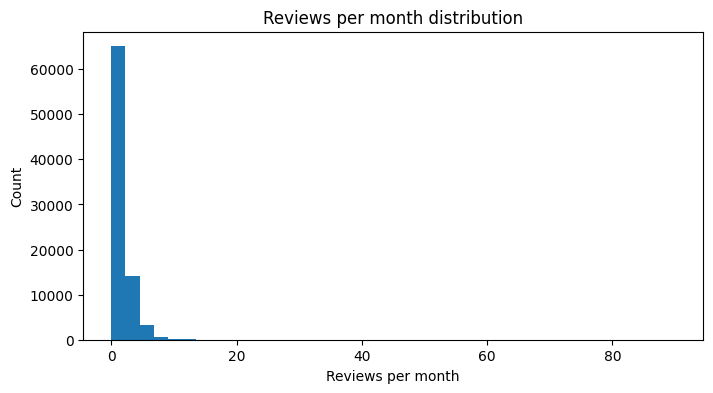

Insight: Mean reviews per month: 1.38


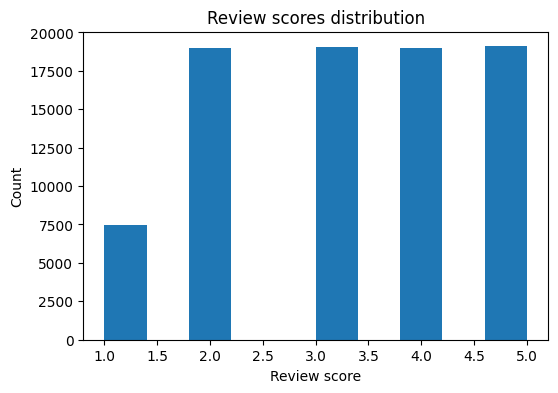

Insight: Typical review score (mode): 5.0


In [30]:
#EDA: Reviews & review_rate_number
if 'reviews per month' in df.columns:
    fig = plt.figure(figsize=(8,4))
    plt.hist(df['reviews per month'].dropna(), bins=40)
    plt.title('Reviews per month distribution')
    plt.xlabel('Reviews per month')
    plt.ylabel('Count')
    plt.show()
    print("Insight: Mean reviews per month:", round(df['reviews per month'].mean(),2))

if 'review rate number' in df.columns:
    fig = plt.figure(figsize=(6,4))
    plt.hist(df['review rate number'].dropna(), bins=10)
    plt.title('Review scores distribution')
    plt.xlabel('Review score')
    plt.ylabel('Count')
    plt.show()
    print("Insight: Typical review score (mode):", df['review rate number'].mode().iloc[0])


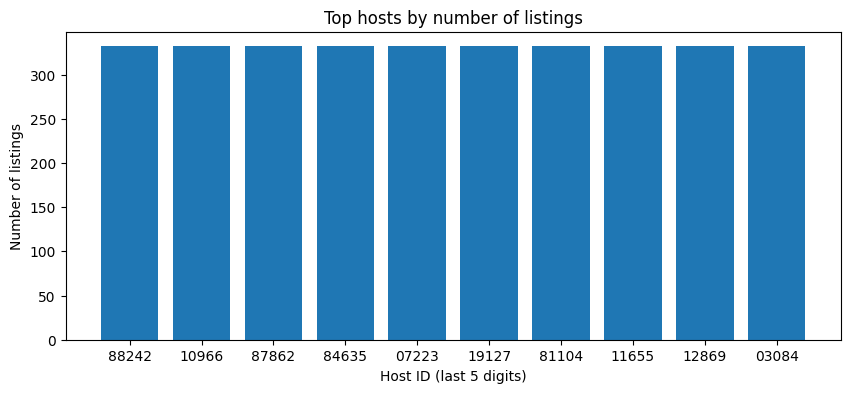

Insight: Top host has 332.0 listings (host id: 20052088242 )


In [31]:
# Top hosts by listings
if 'host id' in df.columns and 'calculated host listings count' in df.columns:
    top_hosts = (
        df.groupby('host id')['calculated host listings count']
        .max()
        .sort_values(ascending=False)
        .head(10)
    )

    # Convert IDs to shorter strings (last 5 digits)
    labels = [str(hid)[-5:] for hid in top_hosts.index]

    fig, ax = plt.subplots(figsize=(10,4))
    ax.bar(labels, top_hosts.values)
    ax.set_title('Top hosts by number of listings')
    ax.set_xlabel('Host ID (last 5 digits)')
    ax.set_ylabel('Number of listings')
    plt.show()

    print("Insight: Top host has", top_hosts.iloc[0], "listings (host id:", top_hosts.index[0], ")")


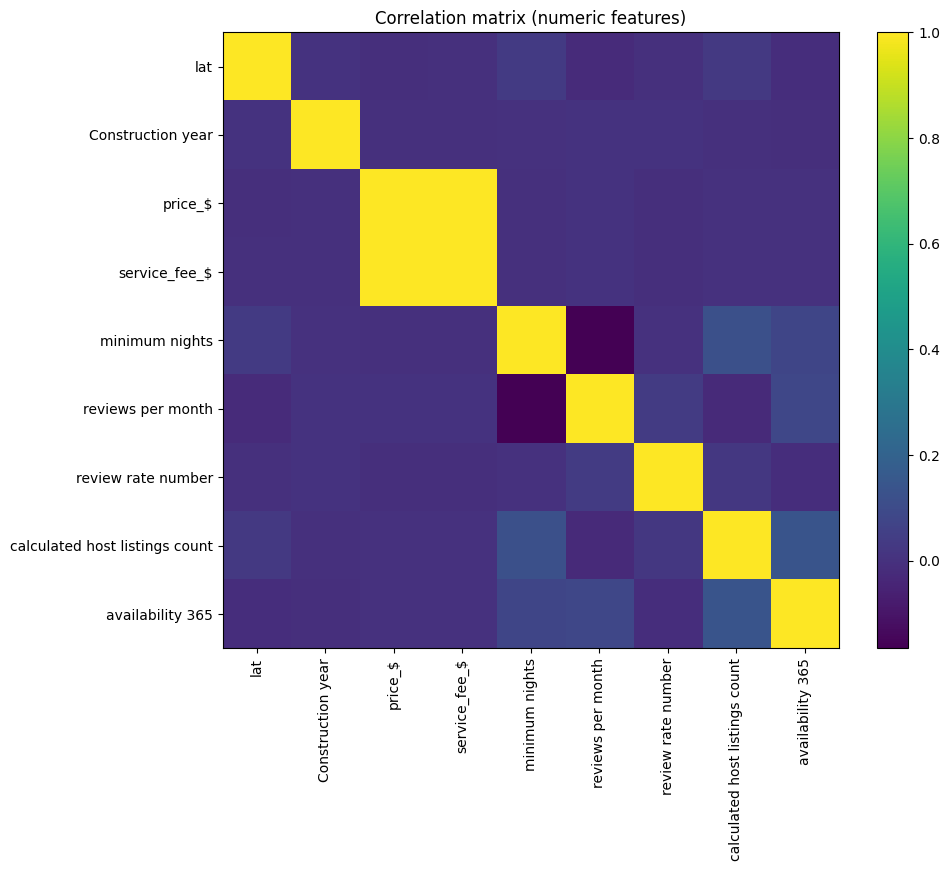

In [32]:
#  Correlation heatmap (numeric columns) using matplotlib imshow
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols) >= 2:
    corr = df[num_cols].corr()
    fig = plt.figure(figsize=(10,8))
    plt.imshow(corr, interpolation='nearest')
    plt.colorbar()
    plt.xticks(range(len(num_cols)), num_cols, rotation=90)
    plt.yticks(range(len(num_cols)), num_cols)
    plt.title('Correlation matrix (numeric features)')
    plt.show()


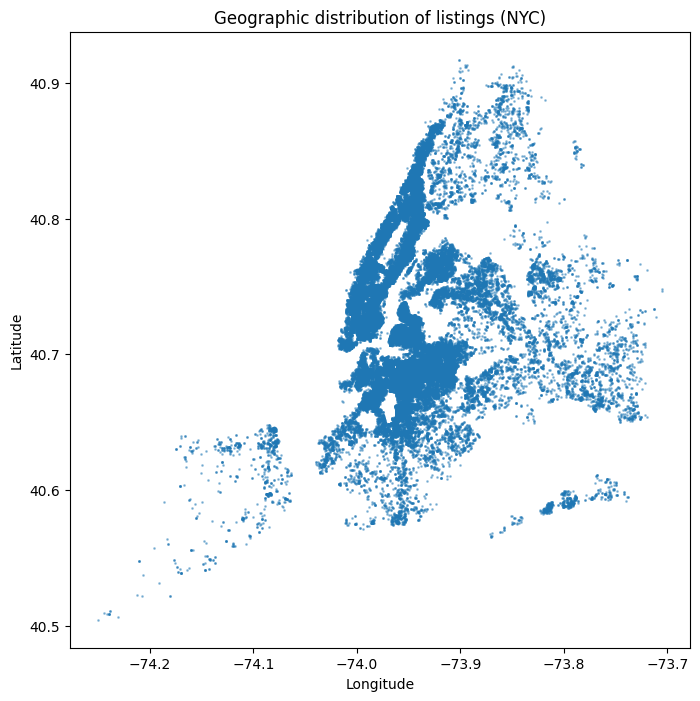

In [33]:
#Geographic scatter (latitude vs longitude)
if 'long' in df.columns and 'lat' in df.columns:
    # Convert 'long' column to numeric, coercing errors
    df['long'] = pd.to_numeric(df['long'], errors='coerce')
    # Drop rows where 'long' or 'lat' are NaN after conversion
    df_plot = df.dropna(subset=['long', 'lat'])

    fig = plt.figure(figsize=(8,8))
    plt.scatter(df_plot['long'], df_plot['lat'], s=1, alpha=0.4)
    plt.title('Geographic distribution of listings (NYC)')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

In [34]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as lgb
from sklearn.cluster import KMeans
import os, joblib, zipfile

In [35]:
# 1. Data Preparation
model_df = df.copy()
model_df = model_df[model_df['price_$'].notnull()]

In [36]:
# Cap extreme outliers
price_cap = 1000
model_df = model_df[model_df['price_$'] <= price_cap]

In [37]:
# 2. Feature Engineering
if 'last review' in model_df.columns:
    model_df['review_month'] = model_df['last review'].dt.month.fillna(0).astype(int)
    model_df['review_season'] = pd.cut(
        model_df['review_month'],
        bins=[0,2,5,8,11,12],
        labels=['Winter','Spring','Summer','Fall','Winter2'],
        include_lowest=True
    )

In [38]:
if 'reviews per month' in model_df.columns and 'review rate number' in model_df.columns:
    model_df['review_quality'] = model_df['reviews per month'] * model_df['review rate number']
# Geo clustering
if 'lat' in model_df.columns and 'long' in model_df.columns:
    coords = model_df[['lat','long']].dropna()
    kmeans = KMeans(n_clusters=8, random_state=42)
    model_df.loc[coords.index, 'geo_cluster'] = kmeans.fit_predict(coords)
else:
    model_df['geo_cluster'] = 0

In [39]:
# 3. Features & Target
numeric_features = [c for c in [
    'lat','long','minimum nights','availability 365',
    'reviews per month','review rate number','calculated host listings count',
    'review_quality'
] if c in model_df.columns]

categorical_features = [c for c in [
    'neighbourhood group','room type','review_season','geo_cluster'
] if c in model_df.columns]

# Drop NA rows for chosen features
model_df = model_df.dropna(subset=numeric_features + categorical_features)


In [40]:
# One-hot encode categoricals
if categorical_features:
    ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    cat_arr = ohe.fit_transform(model_df[categorical_features])
    cat_cols = ohe.get_feature_names_out(categorical_features)
    df_cat = pd.DataFrame(cat_arr, columns=cat_cols, index=model_df.index)
    X = pd.concat([model_df[numeric_features], df_cat], axis=1)
else:
    X = model_df[numeric_features]

y = model_df['price_$']


In [41]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [42]:
# 4. Baseline Model
baseline_pred = X_test.copy()
baseline_pred['room type'] = model_df.loc[X_test.index, 'room type']
baseline_pred['baseline'] = baseline_pred['room type'].map(
    model_df.groupby('room type')['price_$'].median()
)

In [43]:
baseline_mae = mean_absolute_error(y_test, baseline_pred['baseline'])
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_pred['baseline']))
baseline_r2 = r2_score(y_test, baseline_pred['baseline'])

print("\n--- BASELINE METRICS ---")
print(f"MAE:  {baseline_mae:.2f}")
print(f"RMSE: {baseline_rmse:.2f}")
print(f"R²:   {baseline_r2:.4f}")



--- BASELINE METRICS ---
MAE:  235.54
RMSE: 273.34
R²:   0.0000


In [44]:
# 5. Random Forest
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=25,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=25, n_estimators=300, n_jobs=-1,
                      random_state=42)

In [45]:
rf_pred = rf.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print("\n--- RANDOM FOREST METRICS ---")
print(f"MAE:  {rf_mae:.2f}")
print(f"RMSE: {rf_rmse:.2f}")
print(f"R²:   {rf_r2:.4f}")


--- RANDOM FOREST METRICS ---
MAE:  199.38
RMSE: 237.46
R²:   0.2453


In [46]:
# 6. LightGBM
lgb_model = lgb.LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
lgb_model.fit(X_train, y_train)

lgb_pred = lgb_model.predict(X_test)
lgb_mae = mean_absolute_error(y_test, lgb_pred)
lgb_rmse = np.sqrt(mean_squared_error(y_test, lgb_pred))
lgb_r2 = r2_score(y_test, lgb_pred)

print("\n--- LIGHTGBM METRICS ---")
print(f"MAE:  {lgb_mae:.2f}")
print(f"RMSE: {lgb_rmse:.2f}")
print(f"R²:   {lgb_r2:.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021279 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1451
[LightGBM] [Info] Number of data points in the train set: 55129, number of used features: 30
[LightGBM] [Info] Start training from score 525.535072

--- LIGHTGBM METRICS ---
MAE:  227.84
RMSE: 265.42
R²:   0.0571


/tmp/ipython-input-2974426495.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp.head(15), y=feat_imp.head(15).index, palette="viridis")


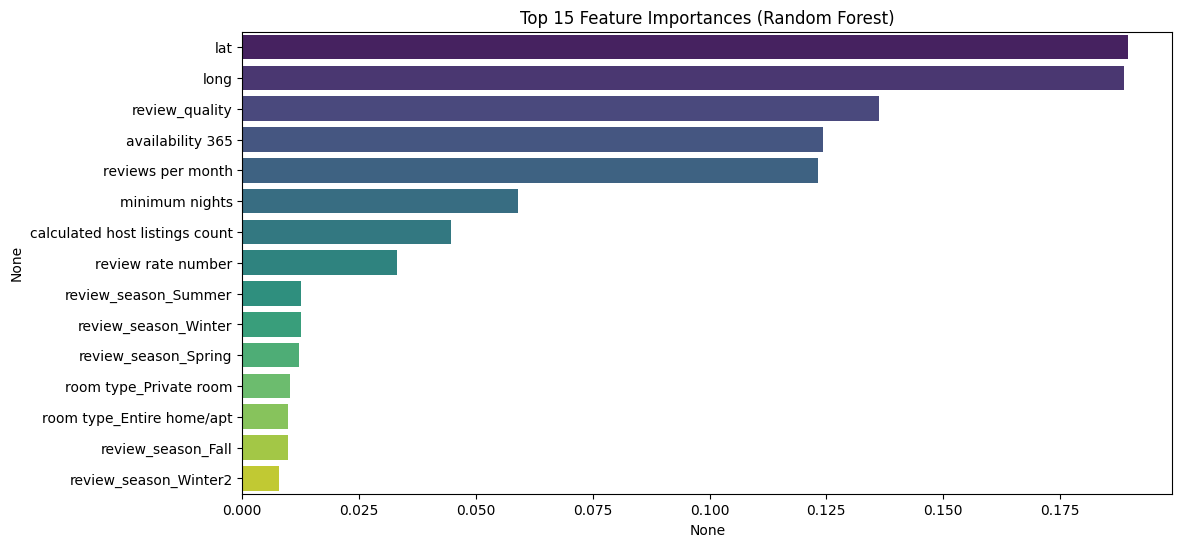

In [47]:
# 8. Feature Importance (RF)
feat_imp = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=feat_imp.head(15), y=feat_imp.head(15).index, palette="viridis")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.show()